In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 3

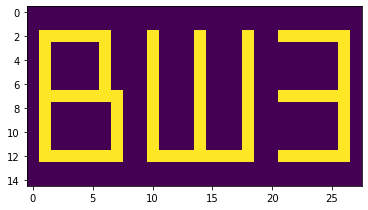

In [23]:
a = np.zeros((15 , 28))
a[2:-2, 1] = 1; a[2, 2:6] = 1
a[2:7, 6] = 1; a[7:-2, 7] = 1
a[7, 2:7] = 1; a[-3, 2:7] = 1
a[2:-2, 10] = 1; a[2:-2, 14] = 1
a[2:-2, 18] = 1; a[-3, 10:19] = 1

a[2:-2, 26] = 1
a[2, 21:26] = 1
a[7, 21:26] = 1
a[-3, 21:26] = 1

plt.imshow(a)

5

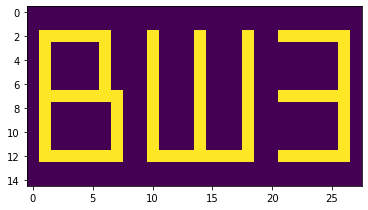

In [24]:
u, s, vh = np.linalg.svd(a)

temp = np.zeros((15, 28), dtype=float)
temp[:15, :15] = np.diag(s)
s = temp

plt.imshow(u @ s @ vh)
np.linalg.matrix_rank(a)



rank: 1


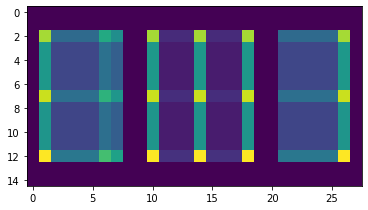



rank: 2


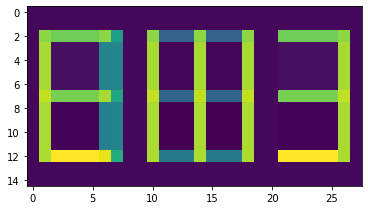



rank: 3


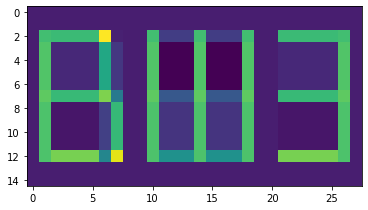



rank: 4


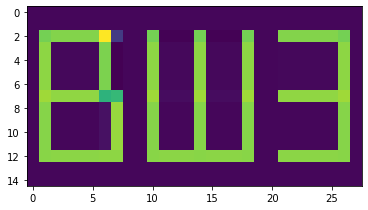



rank: 5


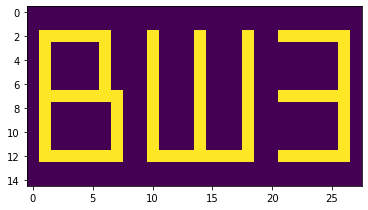

In [25]:
for i in range(1, 6):
  print("\n\nrank: {}".format(i))
  plt.imshow(u[:, :i] @ s[:i, :i] @ vh[:i, :])
  plt.show()

# 4

In [26]:
A = np.ones((2, 10))
A[0] = (2 * np.array(range(10, 0, -1)) - 1)/2
A

array([[9.5, 8.5, 7.5, 6.5, 5.5, 4.5, 3.5, 2.5, 1.5, 0.5],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]])

In [27]:
a=np.array([1,0])
u, s, vh = np.linalg.svd(A)

temp = np.zeros((10, 2))
temp[:2, :2] = np.diag(1/s)
inv_s = temp

f = vh.T @ inv_s @ u.T @ a
for ind, el in enumerate(f):
  print("f{} = {:.5f}".format(ind+1, el))

f1 = 0.05455
f2 = 0.04242
f3 = 0.03030
f4 = 0.01818
f5 = 0.00606
f6 = -0.00606
f7 = -0.01818
f8 = -0.03030
f9 = -0.04242
f10 = -0.05455


In [28]:
A @ f

array([1.00000000e+00, 1.38777878e-17])

# 5

In [29]:
C = np.array([[1, 0.9, 0.7], [0.9, 1, 0.4], [0.7, 0.4, 1]])
C

array([[1. , 0.9, 0.7],
       [0.9, 1. , 0.4],
       [0.7, 0.4, 1. ]])

In [30]:
C_hyp = C.copy()
C_hyp[2, 1] = C_hyp[1, 2] = 0.3
C_hyp

array([[1. , 0.9, 0.7],
       [0.9, 1. , 0.3],
       [0.7, 0.3, 1. ]])

In [52]:
l, s = np.linalg.eig(C)
l_hyp, s_hyp = np.linalg.eig(C_hyp)

In [53]:
print(l, l_hyp)

[2.35363603 0.03034736 0.6160166 ] [ 2.29672779 -0.00735244  0.71062465]


In [54]:
l_hyp[l_hyp<0] = 0

In [58]:
B = np.zeros_like(C)
for i in range(B.shape[0]):
  B[:, i] = l_hyp[i] * s_hyp[i]

for i in range(B.shape[0]):
  B[i] /= np.linalg.norm(B[i])

In [59]:
C_new = B @ B.T
print(C_new)

[[ 1.          0.93245109 -0.06642451]
 [ 0.93245109  1.         -0.4224359 ]
 [-0.06642451 -0.4224359   1.        ]]


array([ 2.04984483e+00, -1.04083409e-17,  9.50155167e-01])

In [67]:
print(
    np.linalg.det(C_new[1:, 1:]),
    np.linalg.det(C_new[:2, :2]),
    np.linalg.det(np.array([[1., -0.06642451],
                            [-0.06642451, 1.]])),
    np.linalg.det(C_new)
)

0.8215479143820372 0.13053496161063505 0.99558778447126 8.004669916610233e-17
